In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
X = np.array([
    np.array([-1, -1]),
    np.array([-1, 1]),
    np.array([1, -1]),
    np.array([1, 1])
])

Y = np.array([-1, -1, -1, 1])

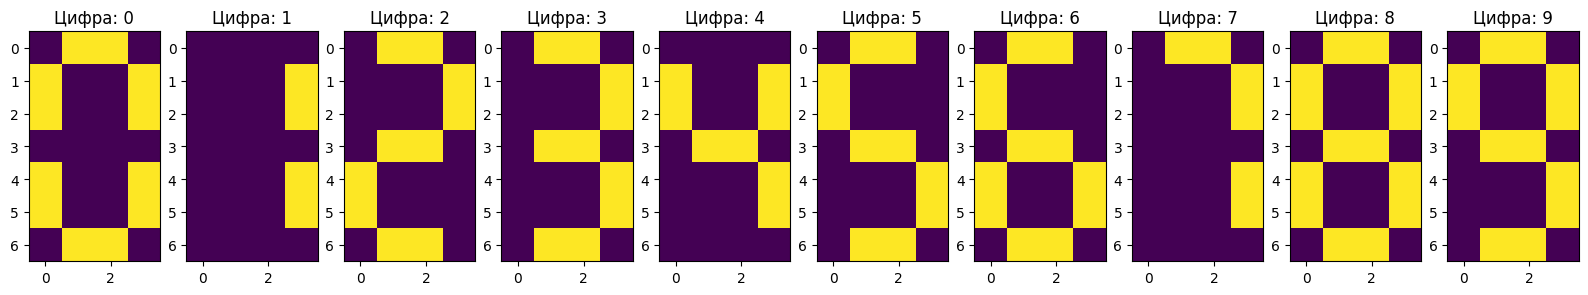

In [13]:
digit_0 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_1 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0]   
])

digit_2 = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 1, 0]   
])

digit_3 = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_4 = np.array([
    [0, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0]   
])

digit_5 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_6 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_7 = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0]   
])

digit_8 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]   
])

digit_9 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0]   
])

digits = np.array([
    digit_0,
    digit_1,
    digit_2,
    digit_3,
    digit_4,
    digit_5,
    digit_6,
    digit_7,
    digit_8,
    digit_9
])

even = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1, -1])

def plot_digits(predicted = None): 
    fig, axs = plt.subplots(1, 10, figsize=(20,5))
    for i in range(10):
        axs[i].imshow(digits[i])
        if predicted is not None:
            even = 'чет' if predicted[i] > 0 else 'нечет'
            axs[i].set_title(f'Цифра: {i}; {even}')
        else:
            axs[i].set_title(f'Цифра: {i}')
    plt.show()

plot_digits()

X = digits.reshape(10, 28)
Y = even

In [14]:
class NeuralNetwork:

    def __init__(self, weights, threshold, alpha=1) -> None:
        self.weights = weights
        self.threshold = threshold
        self.alpha = alpha

        self.accuracy_hist = []

    def predict(self, input_arr):
        result = input_arr.T @ self.weights - self.threshold
        return 1 if result > 0 else -1

    def delta(self, X_value, predicted_value, reference_value):
        E = reference_value - predicted_value
        self.weights = self.weights + E * X_value * self.alpha

    def train(self, train_X, train_Y):
        for idx, X_value in enumerate(train_X):
            self.delta(X_value, self.predict(X_value) , train_Y[idx])
            self.accuracy_hist.append(self.accuracy(train_X, train_Y))
        return self.accuracy_hist

    def accuracy(self, train_X, train_Y):
        correct = 0
        for idx, X_value in enumerate(train_X):
            if self.predict(X_value) == train_Y[idx]:
                correct += 1
        return correct / len(train_X)


In [15]:
n = 10

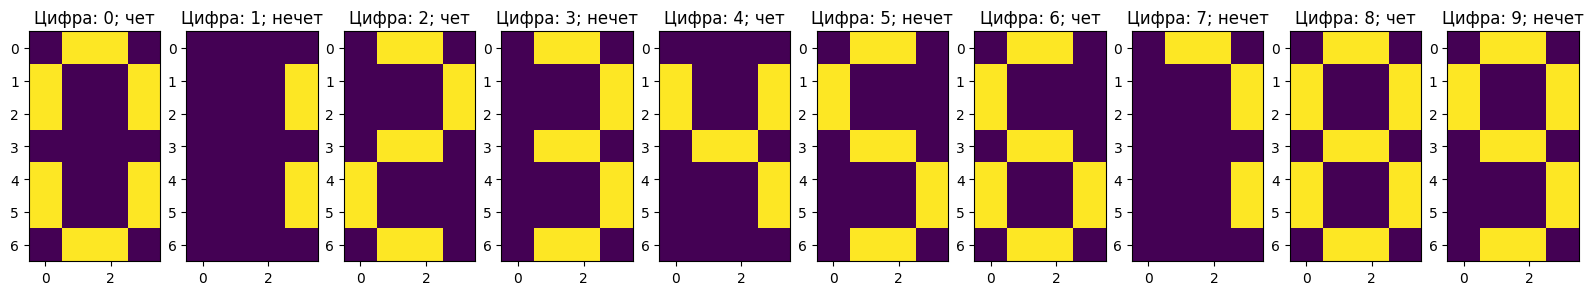

In [16]:
neural_network = NeuralNetwork(np.zeros((X.shape[1],)), 0)

for i in range(n):
    neural_network.train(X, Y)

pred = [neural_network.predict(x) for x in X]
plot_digits(pred)

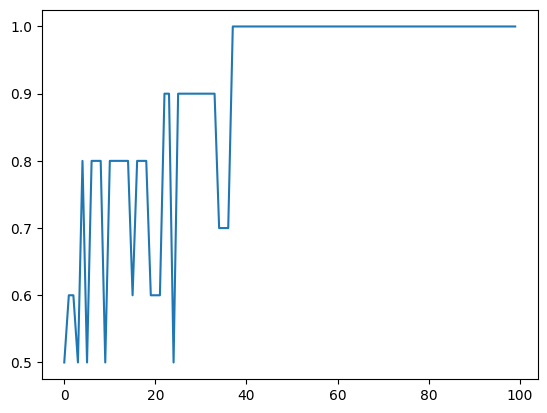

In [17]:
plt.plot(neural_network.accuracy_hist)